Import Important libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the data

In [3]:
df = pd.read_csv("car.csv")
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,BMW,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000
1,Honda,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000
2,Toyota,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000
3,Ford,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,225000
4,Honda,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,130000


Split data to Features(x) and label(y)

In [4]:
x = df.iloc[:, :-1].values # Features: Extracting all rows for all columns except the last one (label) 
y = df.iloc[:, -1].values # Label: Extracting all rows for the last column (label)
print('col   null count')
pd.DataFrame(x).isnull().sum() # Display columns with missing data 

col   null count


0       0
1       0
2       0
3       0
4       0
5       0
6       0
7     221
8     221
9     216
10    221
dtype: int64

Take care of Missing data

In [5]:
from sklearn.impute import SimpleImputer

missing_cols = range(7, 11) 
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
x[:, missing_cols] = imputer.fit_transform(x[:, missing_cols])
print('col   null count')
pd.DataFrame(x).isnull().sum()

col   null count


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

Encoding the Independent Variable

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categories_cols = [0, 3, 4, 5, 6]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categories_cols)], remainder='passthrough')
x = ct.fit_transform(x)
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2014,145500,23.4,1248.0,74.0,5.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2014,120000,21.14,1498.0,103.52,5.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,2006,140000,17.7,1497.0,78.0,5.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2010,127000,23.0,1396.0,90.0,5.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2007,120000,16.1,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2013,110000,18.5,1197.0,82.85,5.0
8124,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2007,119000,16.8,1493.0,110.0,5.0
8125,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2009,120000,19.3,1248.0,73.9,5.0
8126,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2013,25000,23.57,1396.0,70.0,5.0


Splitting the dataset into training set and test set

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=0.2, random_state=9)

Training the Multiple Linear Regression model on the Training set

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [9]:
training_acc = np.ceil(regressor.score(x_train, y_train) * 100)
print("The Training Accuracy = ", training_acc, "%")

The Training Accuracy =  69.0 %


Predicting the Test set results

In [10]:
testing_acc = np.ceil(regressor.score(x_test, y_test) * 100)
print("The Testing_acc Accuracy = ", testing_acc, "%")

The Testing_acc Accuracy =  70.0 %


In [11]:
intercept = regressor.intercept_
coef = regressor.coef_

equation = f'y = {intercept}'
for i in range(len(coef)):
    equation += f' + {coef[i]}x{i}'
    
print("Regression Equation:", equation)

Regression Equation: y = -62142852.62880539 + -14359.469372547099x0 + 13065.02536138546x1 + -5995.793069859838x2 + -2385.147443516917x3 + 9675.384524101464x4 + -861.44492886445x5 + -44157.69290361585x6 + 142826.088252631x7 + -97806.95042014902x8 + 196401.52474644931x9 + -44323.8697753921x10 + -152077.65497105083x11 + 236881.64116772084x12 + -236881.64116771505x13 + -411722.20411942265x14 + -399952.68897873344x15 + -456643.5396379592x16 + 1681560.8206187296x17 + -413242.3878826199x18 + 30867.675173716452x19 + -0.9596647086018493x20 + 13006.138919874793x21 + 63.192544815518986x22 + 13074.369246741733x23 + -30653.538638056405x24


In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [13]:
regressor.fit(x_train_poly,y_train)

LinearRegression()

In [14]:
training_acc = np.ceil(regressor.score(x_train_poly, y_train) * 100)
print("The Training Accuracy = ", training_acc, "%")

The Training Accuracy =  95.0 %


In [15]:
testing_acc = np.ceil(regressor.score(x_test_poly, y_test) * 100)
print("The Testing Accuracy = ", testing_acc, "%")

The Testing Accuracy =  93.0 %


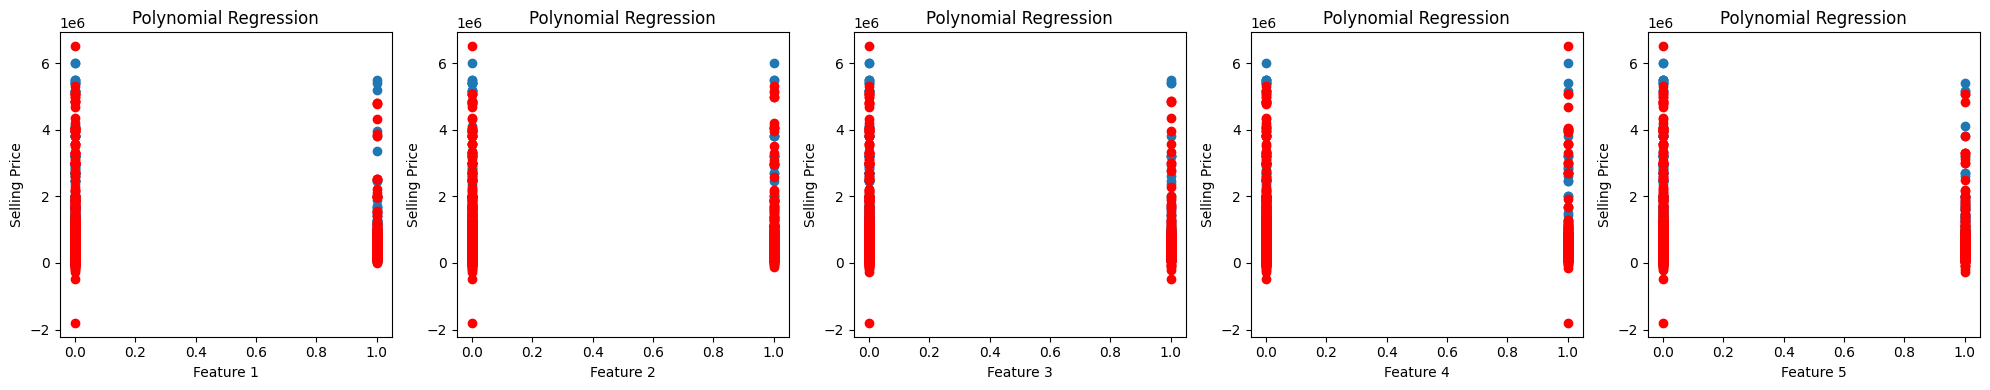

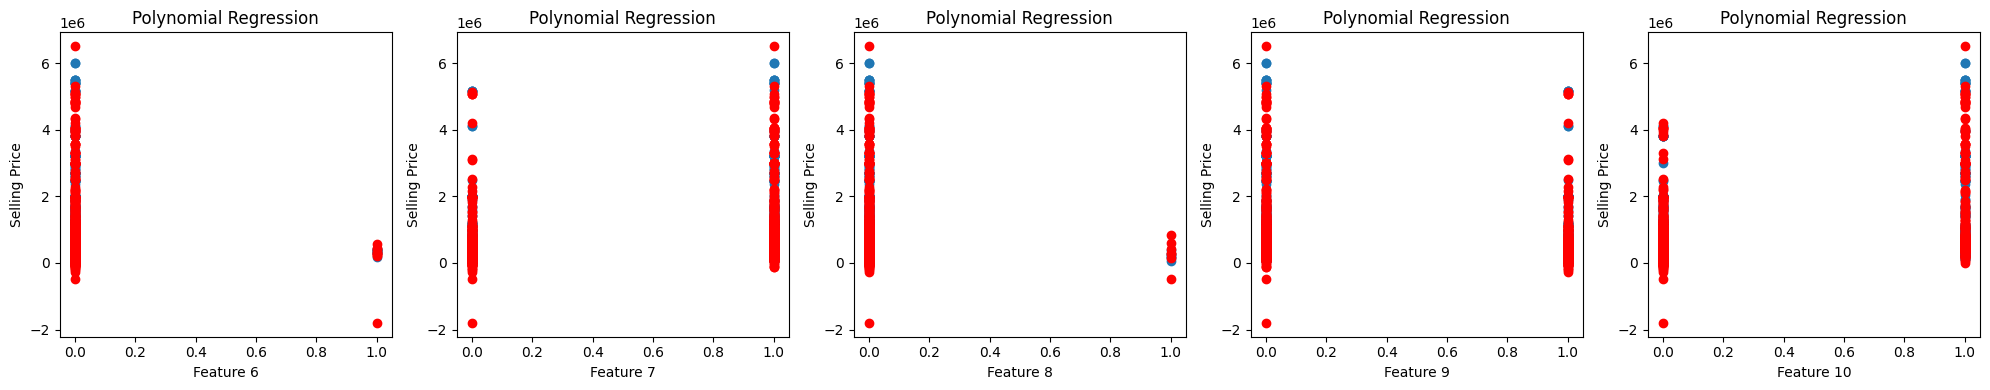

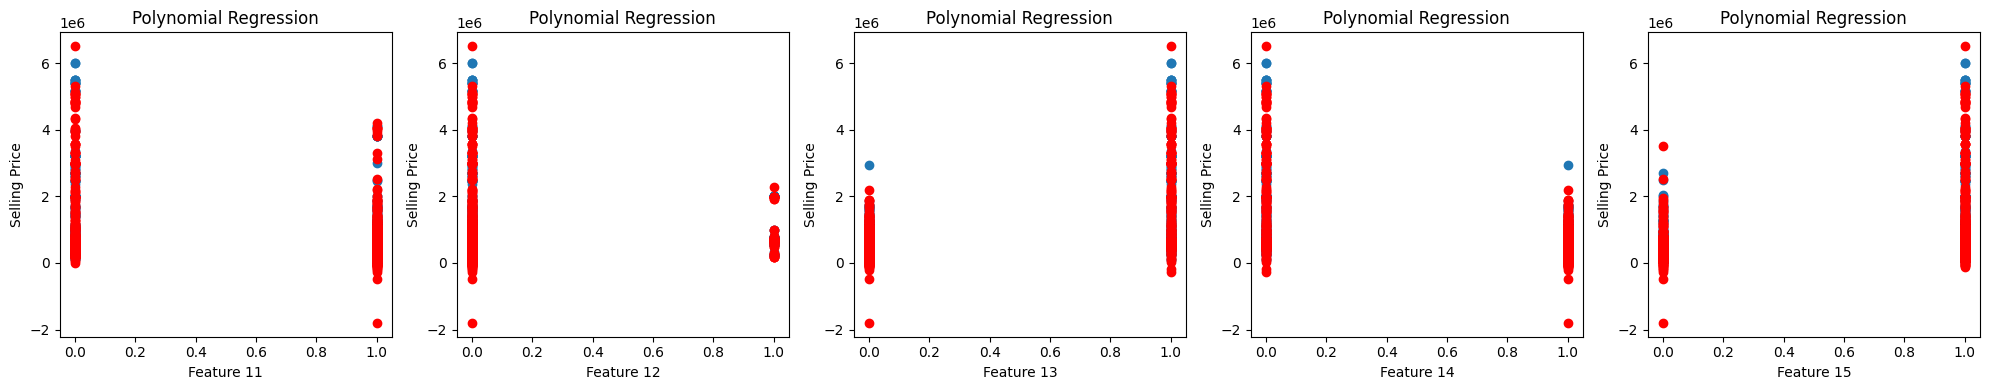

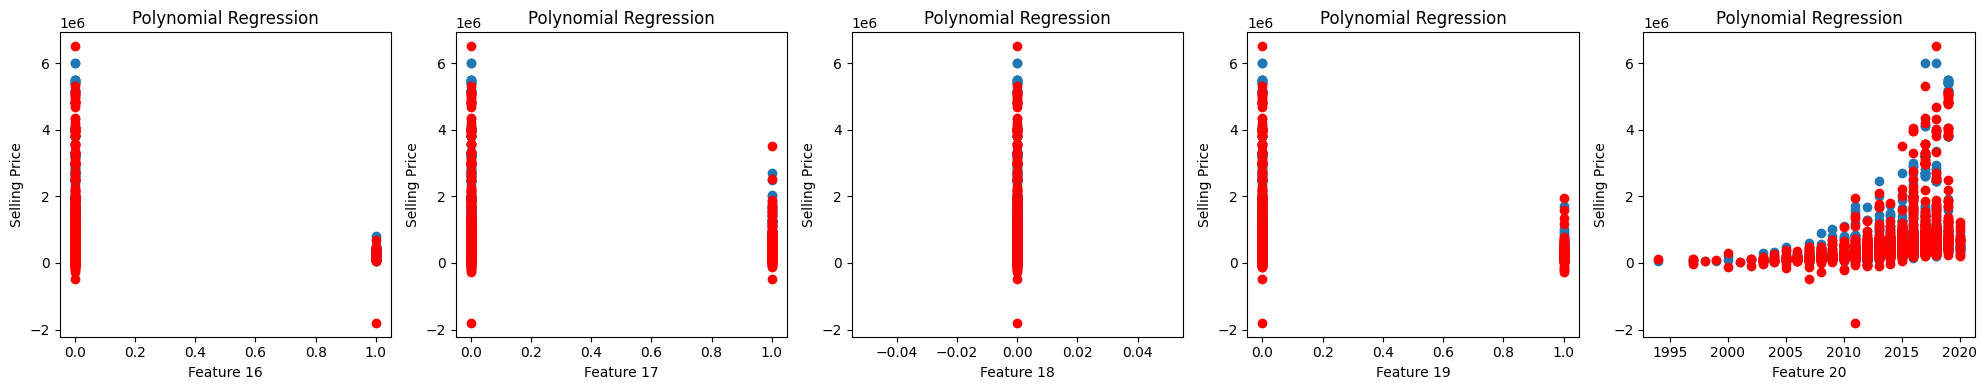

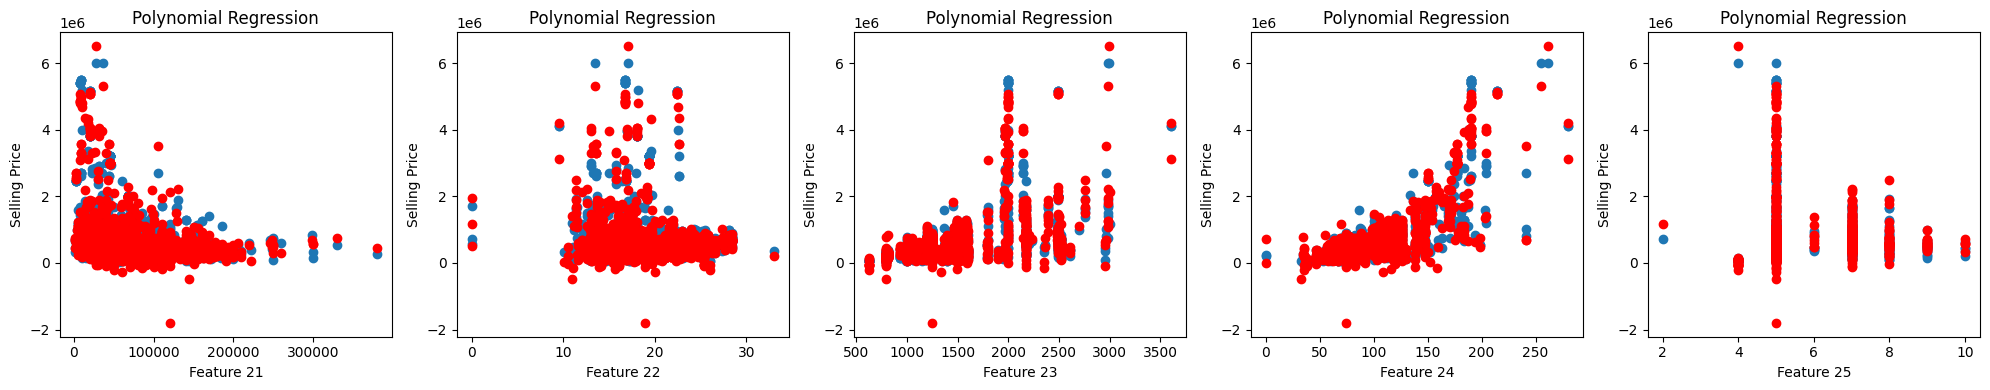

In [21]:
num_features = x_test.shape[1]
plots_per_row = 5
y_pred = regressor.predict(x_test_poly)

for i in range(int(np.ceil(num_features / plots_per_row))):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(20, 4)) 
    for j in range(plots_per_row):
        index = i * plots_per_row + j
        if index >= num_features:
            break
        # Plot actual vs predicted
        axes[j].scatter(x_test[:, index], y_test)
        axes[j].scatter(x_test[:, index], y_pred, c='r')
        # Set title, x label, and y label
        axes[j].set_title('Polynomial Regression')
        axes[j].set_xlabel(f'Feature {index+1}')
        axes[j].set_ylabel('Selling Price')
        
    plt.tight_layout()
    plt.show()
